## Import packages

In [4]:
import numpy as np
import cv2
import pickle
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode
from pyzbar.pyzbar import ZBarSymbol

%matplotlib inline

## Capture the whole image

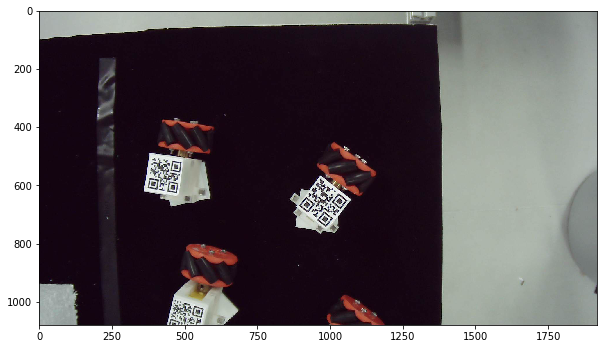

In [22]:
def show(img, cmap='gray'):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10,16))
    ax.imshow(img, cmap)

# Capture image
cameraCapture = cv2.VideoCapture(0) # open usb camera
cameraCapture.set(15, -6.0); # Modified
cameraCapture.set(3,1920)
cameraCapture.set(4,1080)
success, img = cameraCapture.read()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
if success == False:
    print "No image captured."
    #print("No image captured.")
else:
    show(img, None)
cameraCapture.release() 

In [7]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

## Undistort image

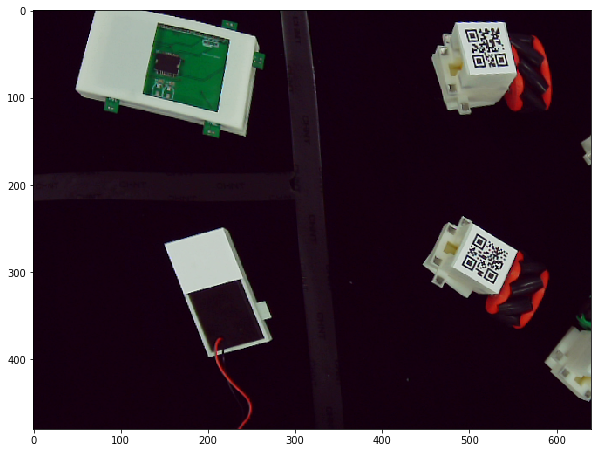

In [38]:
# # Load calib parameters
# with open('objs.pkl', 'rb') as f:
#     mtx, dist = pickle.load(f)

# # Calibrate distortion
# h,  w = img.shape[:2]
# newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h)) # 自由比例参数
# dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# img = dst
# show(img)

## Detect objects

### Detect wheels and get coords

In [39]:
qr = decode(img, symbols=[ZBarSymbol.QRCODE])

# Draw rectangle boundaries with four vertices
wheel_mid_points = []
wheel_orient = []
for i in xrange(len(qr)):    
    # Find middle point of qrcode
    points = qr[i].polygon
    pt_mid = np.mean(points, axis=0)
    pt_mid = np.int32(pt_mid)
    wheel_mid_points.append(pt_mid)
        
    # Find orientation of qrcode
    vx = points[0][0] - points[1][0]
    vy = points[0][1] - points[1][1]
    wheel_orient.append([vx,vy])

### Detect control box and get coords

In [ ]:
# Preprocessing--------------------------------------------------------------------
imgsub = img[:300,:600]
imgflt = cv2.bilateralFilter(imgsub,9,75,75)

# Pick object indices---------------------------------------------------------------
ind = np.argwhere(imgflt>20)
indf = np.flip(ind,1)

# OBB------------------------------------------------------------------------------
ca = np.cov(indf,y = None,rowvar = 0,bias = 0)
v, vect = np.linalg.eig(ca)
idx = v.argsort()[::-1]
vect = vect[:,idx]
tvect = np.transpose(vect)

#use the inverse of the eigenvectors as a rotation matrix and
#rotate the points so they align with the x and y axes
ar = np.dot(indf,np.linalg.inv(tvect))

# get the minimum and maximum x and y 
mina = np.min(ar,axis=0)
maxa = np.max(ar,axis=0)
diff = (maxa - mina)*0.5

# the center is just half way between the min and max xy
center = mina + diff

# get the 4 corners by subtracting and adding half the bounding boxes height and width to the center
corners = np.array([center+[-diff[0],-diff[1]],center+[diff[0],-diff[1]],center+[diff[0],diff[1]],center+[-diff[0],diff[1]],center+[-diff[0],-diff[1]]])

# use the the eigenvectors as a rotation matrix and
# rotate the corners and the centerback
corners = np.dot(corners,tvect)
center = np.dot(center,tvect)

sum1 = 0 # Sum values along the vector 
sum2 = 0
for i in ind:
    if tvect[0].dot(i-center) < 0:
        sum1 = sum1 + img[i[0], i[1]]
    else:
        sum2 = sum2 + img[i[0], i[1]]
        
cb_orient = -tvect[0] if sum1 > sum2 else tvect[0]

### Detect battery and get coords

In [ ]:
# Preprocessing--------------------------------------------------------------------
imgsub = img[300:,:600]
imgflt = cv2.bilateralFilter(imgsub,9,75,75)

# Pick object indices---------------------------------------------------------------
ind = np.argwhere(imgflt>20)
indf = np.flip(ind,1)

# OBB------------------------------------------------------------------------------
ca = np.cov(indf,y = None,rowvar = 0,bias = 0)
v, vect = np.linalg.eig(ca)
idx = v.argsort()[::-1]
vect = vect[:,idx]
tvect = np.transpose(vect)

#use the inverse of the eigenvectors as a rotation matrix and
#rotate the points so they align with the x and y axes
ar = np.dot(indf,np.linalg.inv(tvect))

# get the minimum and maximum x and y 
mina = np.min(ar,axis=0)
maxa = np.max(ar,axis=0)
diff = (maxa - mina)*0.5

# the center is just half way between the min and max xy
center = mina + diff

# get the 4 corners by subtracting and adding half the bounding boxes height and width to the center
corners = np.array([center+[-diff[0],-diff[1]],center+[diff[0],-diff[1]],center+[diff[0],diff[1]],center+[-diff[0],diff[1]],center+[-diff[0],-diff[1]]])

# use the the eigenvectors as a rotation matrix and
# rotate the corners and the centerback
bat_corners = np.dot(corners,tvect)
bat_center = np.dot(center,tvect)

sum1 = 0 # Sum values along the vector 
sum2 = 0
for i in ind:
    if tvect[0].dot(i-center) < 0:
        sum1 = sum1 + img[i[0], i[1]]
    else:
        sum2 = sum2 + img[i[0], i[1]]
        
bat_orient = -tvect[0] if sum1 > sum2 else tvect[0]

[Point(x=609, y=768), Point(x=693, y=837), Point(x=759, y=752), Point(x=675, y=683)]
[-84, -69]
[Point(x=796, y=306), Point(x=867, y=388), Point(x=949, y=318), Point(x=880, y=236)]
[-71, -82]
[Point(x=1311, y=219), Point(x=1404, y=274), Point(x=1453, y=185), Point(x=1362, y=130)]
[-93, -55]


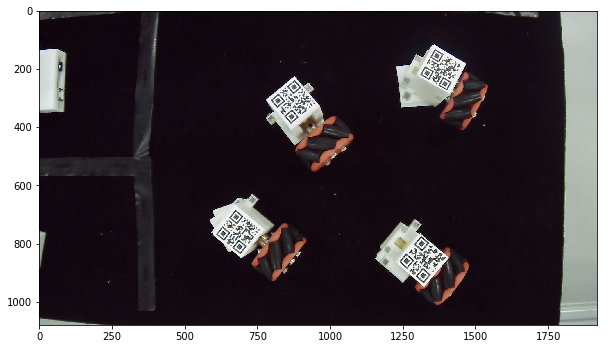

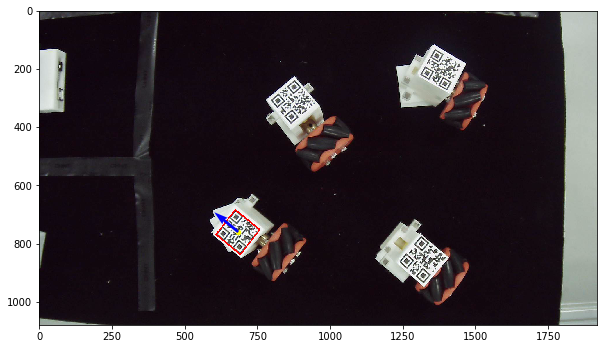

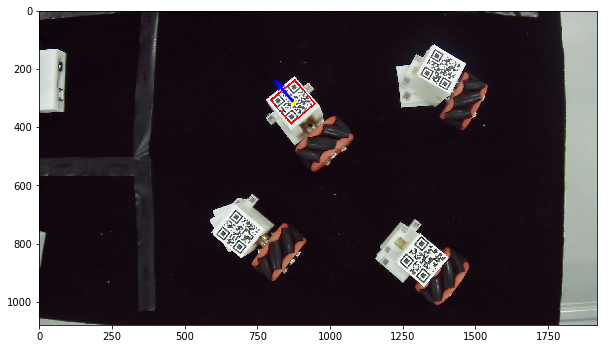

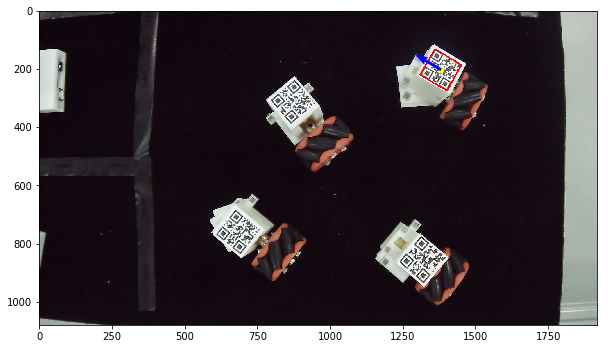

In [34]:
import imutils

def show(img, cmap='gray'):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10,16))
    ax.imshow(img, cmap)

# Capture image
cameraCapture = cv2.VideoCapture(0) # open usb camera
cameraCapture.set(15, -6.0); # Modified
cameraCapture.set(3,1920)
cameraCapture.set(4,1080)
success, img = cameraCapture.read()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
if success == False:
    print "No image captured."
    #print("No image captured.")
else:
    show(img, None)
cameraCapture.release() 

#img = cv2.imread(r'C:\Users\lstyl\Desktop\CE\CV\imgs\1.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = imutils.resize(img, width=400)
#img2 = imgflt[:,500:1500]
#qr = decode(img, symbols=[ZBarSymbol.QRCODE])
(_, thresh) = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY) # 二值化
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))#形态学处理，定义矩形结构
#closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)#闭运算，先膨胀后腐蚀
#closed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)#开运算，先腐蚀后膨胀
#closed = cv2.erode(thresh, kernel, iterations = 1)#腐蚀图像，去除噪声点
closed = cv2.dilate(thresh, kernel, iterations = 1)#膨胀图像，连接断点

qr = decode(closed)

# Draw rectangle boundaries with four vertices
mid_points = np.zeros((4,2))
orient = np.zeros((4,2))
for i in range(len(qr)):  
    points = qr[i].polygon
    draw_box = img.copy()
    cv2.polylines(draw_box, np.int32([points]), True, (255, 0, 0), 3)
    show(draw_box)
    print(points)
    
    # Find middle point of qrcode
    pt_mid = np.mean(points, axis=0)
    pt_mid = np.int32(pt_mid)
    ptx = pt_mid[0]
    pty = pt_mid[1]
    
    mid_points[int(qr[i][0])] = pt_mid
    
    
    # Plot middle point
    plt.scatter(ptx, pty, s=20, c='yellow')
    
    # Draw orientation of qrcode
    vx = points[0][0] - points[1][0]
    vy = points[0][1] - points[1][1]
    plt.quiver(ptx, pty, vx, vy, scale_units=None, angles='xy', color='blue', width=0.005)
    plt.show
    orient[int(qr[i][0])] = [vx, vy]
    print([vx,vy])    

In [27]:
cv2.imshow()

[Decoded(data='3', type='QRCODE', rect=Rect(left=374, top=504, width=117, height=123), polygon=[Point(x=374, y=609), Point(x=475, y=627), Point(x=491, y=520), Point(x=390, y=504)])]